In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import gaussian_kde
from matplotlib.colors import Normalize 
import os
import seaborn as sns
BASE_DIR = os.getcwd() + "/filtered/"

/u/yashjain/anaconda3/envs/vitessce-env/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
submissions_df = pd.read_csv(BASE_DIR+'/Submissions.csv', infer_datetime_format=True)
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,13330517,34824672,9240143.0,11208527,151877948.0,11/22/2023,11/22/2023,False,0.000000,0.000000,0.000000,0.000000
1,13330518,34673975,9240143.0,11208527,151007289.0,11/16/2023,11/16/2023,False,0.000000,0.000000,0.000000,0.000000
2,13330519,34638005,9240143.0,11208527,150746669.0,11/15/2023,11/15/2023,False,0.000000,0.000000,0.000000,0.000000
3,13330520,34833580,9240143.0,11208527,151920526.0,11/23/2023,11/23/2023,False,0.000000,0.000000,0.000000,0.000000
4,13330521,34616893,9240143.0,11208527,150604837.0,11/14/2023,11/14/2023,False,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
33165,14549643,39203060,6625861.0,11209445,188790276.0,07/18/2024,07/18/2024,True,NaN,NaN,NaN,NaN
33166,14549644,39202942,6625861.0,11209445,188788797.0,07/18/2024,07/18/2024,True,NaN,NaN,NaN,NaN
33167,14549645,39207494,6625861.0,11209445,188837538.0,07/18/2024,07/18/2024,True,0.670762,0.670762,0.723641,0.723641
33168,14555791,39511238,9253999.0,11487688,192285976.0,08/12/2024,08/12/2024,True,NaN,NaN,NaN,NaN


In [3]:
#were there any after the deadline?
print(submissions_df.IsAfterDeadline.unique())

[False  True]


In [4]:
#remove any submissions after deadline
submissions_df = submissions_df[submissions_df.IsAfterDeadline==False]
submissions_df

,Unnamed: 0,Id,SubmittedUserId,TeamId,SourceKernelVersionId,SubmissionDate,ScoreDate,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
0,13330517,34824672,9240143.0,11208527,151877948.0,11/22/2023,11/22/2023,False,0.000000,0.000000,0.000000,0.000000
1,13330518,34673975,9240143.0,11208527,151007289.0,11/16/2023,11/16/2023,False,0.000000,0.000000,0.000000,0.000000
2,13330519,34638005,9240143.0,11208527,150746669.0,11/15/2023,11/15/2023,False,0.000000,0.000000,0.000000,0.000000
3,13330520,34833580,9240143.0,11208527,151920526.0,11/23/2023,11/23/2023,False,0.000000,0.000000,0.000000,0.000000
4,13330521,34616893,9240143.0,11208527,150604837.0,11/14/2023,11/14/2023,False,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
33029,13798855,36292676,4240322.0,11283300,161785868.0,02/05/2024,02/05/2024,False,0.888090,0.888090,0.749805,0.749806
33030,13798856,36292612,4240322.0,11283300,161785015.0,02/05/2024,02/05/2024,False,0.881586,0.881587,0.711600,0.711600
33031,13798857,36292250,4240322.0,11283300,161781424.0,02/05/2024,02/05/2024,False,0.895120,0.895120,0.774105,0.774105
33032,13798858,36257307,4240322.0,11283300,161437053.0,02/02/2024,02/02/2024,False,0.897321,0.897322,0.743866,0.743867


In [5]:
#transform data 
#need for each team #submissions and max private leaderboard score
grouped_submissions = submissions_df.groupby("TeamId")

grouped_submissions = pd.DataFrame(grouped_submissions.max("PrivateScoreLeaderboardDisplay"))

In [6]:
grouped_submissions.sort_values(by=['PrivateScoreLeaderboardDisplay'],ascending=False).head(15)

,Unnamed: 0,Id,SubmittedUserId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision
TeamId,,,,,,,,,
11283300,13798859,36293603,15188610.0,161795835.0,False,0.898060,0.898060,0.835342,0.835343
11210558,13797793,36304367,207760.0,161894775.0,False,0.892149,0.892149,0.774246,0.774246
11233892,13796051,36001421,5895718.0,159398872.0,False,0.043141,0.043141,0.756793,0.756793
11217066,13797098,36304833,1690820.0,161903547.0,False,0.886176,0.886176,0.756358,0.756358
11494224,13798500,36307430,7285387.0,161931932.0,False,0.857664,0.857665,0.753058,0.753058
11207392,13796409,36009071,282250.0,159473063.0,False,0.827196,0.827197,0.745344,0.745344
11219862,13741209,36306179,1504864.0,161908838.0,False,0.850780,0.850780,0.733462,0.733462
11228687,13796874,36306458,2369671.0,161921243.0,False,0.859409,0.859410,0.710390,0.710390
11371916,13796456,36301092,8751329.0,161861056.0,False,0.883567,0.883567,0.709112,0.709113


In [7]:
grouped_teams = submissions_df
grouped_teams["NumSubmissions"] = 1
grouped_teams = grouped_teams.groupby("TeamId").sum()
grouped_teams

/tmp/ipykernel_2599735/1183672407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_teams["NumSubmissions"] = 1


,Unnamed: 0,Id,SubmittedUserId,SourceKernelVersionId,IsAfterDeadline,PublicScoreLeaderboardDisplay,PublicScoreFullPrecision,PrivateScoreLeaderboardDisplay,PrivateScoreFullPrecision,NumSubmissions
TeamId,,,,,,,,,,
11205901,13440019,35762651,2917570.0,1.577897e+08,0,0.797895,0.797896,0.417193,0.417194,1
11205974,687202374,1821638025,113655234.0,8.035609e+09,0,17.143413,17.143428,11.146617,11.146631,51
11206255,1174322186,3113162186,69993044.0,1.373660e+10,0,56.832170,56.832214,36.614058,36.614094,87
11206545,26860742,71139666,26747916.0,3.125043e+08,0,0.000000,0.000000,0.000000,0.000000,2
11207209,294201350,770741738,138171088.0,3.368535e+09,0,1.095398,1.095401,4.216440,4.216449,22
...,...,...,...,...,...,...,...,...,...,...
11578325,315600134,833978004,130735381.0,3.714244e+09,0,10.961414,10.961421,6.108437,6.108444,23
11578982,123525640,326098786,168161607.0,1.451445e+09,0,6.009144,6.009147,3.185363,3.185364,9
11579298,41187066,108782669,35170755.0,4.845015e+08,0,2.489401,2.489402,0.909020,0.909021,3


In [8]:
teams = pd.read_csv(BASE_DIR+'/Teams.csv')
teams.head(2)

,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
0,6851999,11205901,61446,2917570.0,KSMCG90,NaN,01/05/2024,35762651.0,35762651.0,False,NaN,NaN,718.0,803.0,NaN
1,6852056,11205974,61446,2228534.0,Hiểu Vy,NaN,01/22/2024,35910366.0,35972335.0,False,NaN,NaN,469.0,352.0,NaN


In [9]:
# Set Competition Id for Kaggle = 61446
teams = teams[teams['CompetitionId']==61446]
teams.head(2)

,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
0,6851999,11205901,61446,2917570.0,KSMCG90,NaN,01/05/2024,35762651.0,35762651.0,False,NaN,NaN,718.0,803.0,NaN
1,6852056,11205974,61446,2228534.0,Hiểu Vy,NaN,01/22/2024,35910366.0,35972335.0,False,NaN,NaN,469.0,352.0,NaN


In [10]:
teams.sort_values(by=['PrivateLeaderboardRank'],ascending=True).head(10)

,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
294,6894888,11283300,61446,4240322.0,Clevert,NaN,02/05/2024,36227545.0,36292250.0,False,1.0,02/08/2024,1.0,1.0,475522.0
157,6868098,11233892,61446,5895718.0,ryo,NaN,01/18/2024,35999809.0,35999809.0,False,1.0,02/08/2024,1024.0,2.0,475657.0
872,7014674,11494224,61446,7285387.0,ForcewithMe,NaN,02/06/2024,36225255.0,36307333.0,False,1.0,02/08/2024,571.0,3.0,475074.0
30,6854814,11210558,61446,207760.0,Igor Krashenyi,NaN,02/06/2024,36266188.0,36302015.0,False,1.0,02/08/2024,5.0,4.0,475052.0
675,6987037,11448169,61446,2755695.0,Ivan Panshin,NaN,02/06/2024,36262367.0,36285278.0,False,1.0,02/08/2024,10.0,5.0,475288.0
65,6858570,11217066,61446,1690820.0,Volodymyr,NaN,02/06/2024,36303866.0,36303866.0,False,1.0,02/08/2024,9.0,6.0,475252.0
138,6865195,11228687,61446,2369671.0,sakaku,NaN,02/06/2024,36306458.0,36306458.0,False,1.0,02/08/2024,487.0,7.0,475964.0
463,6943723,11371916,61446,2584996.0,ynhuhu,NaN,02/06/2024,36163047.0,36301092.0,False,1.0,02/08/2024,12.0,8.0,NaN
7,6853034,11207392,61446,282250.0,tereka,NaN,01/18/2024,35686873.0,35686873.0,False,1.0,02/08/2024,662.0,9.0,475080.0
841,7008432,11484668,61446,15291149.0,yarkhom,NaN,02/06/2024,36307479.0,36307530.0,False,1.0,02/08/2024,658.0,10.0,NaN


In [11]:
team_ids = [11283300, 11233892, 11494224, 11210558, 11448169] # Winning 5 teams

In [12]:
grouped_teams_df = pd.DataFrame(grouped_teams)
grouped_teams_df.NumSubmissions

TeamId
11205901     1
11205974    51
11206255    87
11206545     2
11207209    22
            ..
11578325    23
11578982     9
11579298     3
11580115    12
11580146    20
Name: NumSubmissions, Length: 1150, dtype: int64

In [13]:
teams[teams['Id'].isin(team_ids)]

,Unnamed: 0,Id,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,WriteUpForumTopicId
30,6854814,11210558,61446,207760.0,Igor Krashenyi,NaN,02/06/2024,36266188.0,36302015.0,False,1.0,02/08/2024,5.0,4.0,475052.0
157,6868098,11233892,61446,5895718.0,ryo,NaN,01/18/2024,35999809.0,35999809.0,False,1.0,02/08/2024,1024.0,2.0,475657.0
294,6894888,11283300,61446,4240322.0,Clevert,NaN,02/05/2024,36227545.0,36292250.0,False,1.0,02/08/2024,1.0,1.0,475522.0
675,6987037,11448169,61446,2755695.0,Ivan Panshin,NaN,02/06/2024,36262367.0,36285278.0,False,1.0,02/08/2024,10.0,5.0,475288.0
872,7014674,11494224,61446,7285387.0,ForcewithMe,NaN,02/06/2024,36225255.0,36307333.0,False,1.0,02/08/2024,571.0,3.0,475074.0


In [14]:
df_to_plot = pd.DataFrame()
df_to_plot["NumSubmissions"] = grouped_teams_df.NumSubmissions
df_to_plot["HighScores"] = grouped_submissions.PrivateScoreLeaderboardDisplay
df_to_plot.to_csv("source_data_fig2_subVSscores.csv", index=False)
df_to_plot_v2 = pd.read_csv('source_data_fig2_subVSscores.csv')
df_to_plot_v2

,NumSubmissions,HighScores
0,1,0.417193
1,51,0.551567
2,87,0.584816
3,2,0.000000
4,22,0.601854
...,...,...
1145,23,0.459631
1146,9,0.455943
1147,3,0.455943
1148,12,0.461820


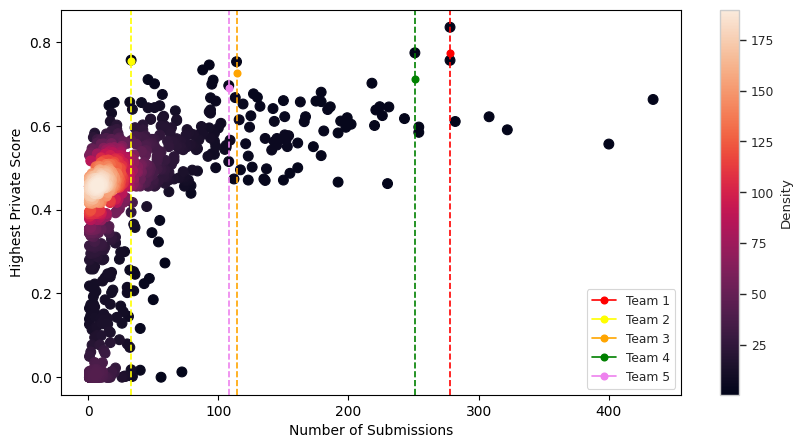

In [15]:
# identify data
x = df_to_plot_v2["NumSubmissions"]
y = df_to_plot_v2["HighScores"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="whitegrid", context="paper")
#plt.figure(figsize=(10, 5))
ax.scatter(x, y, c=z, s=50)
ax.plot(278, 0.774,'red',marker="o", label='Team 1')
ax.plot(33, 0.755,'yellow',marker="o", label='Team 2')
ax.plot(114, 0.727,'orange',marker="o", label='Team 3')
ax.plot(251, 0.712,'green',marker="o", label='Team 4')
ax.plot(108, 0.691,'violet',marker="o", label='Team 5')

ax.axvline(x=278, color='red', linestyle='--')
ax.axvline(x=33, color='yellow', linestyle='--')
ax.axvline(x=114, color='orange', linestyle='--')
ax.axvline(x=251, color='green', linestyle='--')
ax.axvline(x=108, color='violet', linestyle='--')
ax.legend()

#plt.xlim([0, 180])
ax.set_xlabel('Number of Submissions')
#plt.ylim([0, 150])
ax.set_ylabel('Highest Private Score')
#plt.title('Number of Submissions vs. Private Score')
norm = Normalize(vmin = np.min(z)*2000, vmax = np.max(z)*2000)
cbar = fig.colorbar(cm.ScalarMappable(norm = norm), ax=ax)
cbar.ax.set_ylabel('Density')
plt.savefig('updatedheatmap.png', dpi=600)
plt.savefig('updatedheatmap.svg', dpi=600)

plt.show()
